<a href="https://colab.research.google.com/github/Varshitha-kommuri/ANN_MNIST/blob/main/MULTINOMIAL_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required Libraries :




In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

Installing the Natural Language Tool Kit (nltk) :

In [ ]:
! pip install -U nltk

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


 Loading restaurant reviews from a "Restaurant_Reviews.tsv" file into a DataFrame.
  The data in the file has 1000 reviews and two columns: "Review" and "Liked." In the "Liked" column, a value of 0 represents a negative review, while a value of 1 represents a positive review.

In [ ]:
#As, it is a .tsv file, the seperator is '\t'.
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

#displaying the shape of the dataset.
print(df.shape)

#displaying first 5 rows of the data.
df.head()

(1000, 2)


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Droping the column 'Liked' (dependent feature) and storing the independent feature i.e., the reviews in the dataframe 'x'

In [ ]:
#Getting only the independent features.
x = df.drop('Liked',axis=1)

#displaying the shape of the dataframe 'x'.
print(x.shape)

#displaying first 5 rows of 'x'
x.head()

(1000, 1)


,Review
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...


Storing the dependent feature i.e., Liked in the dataframe 'y'

In [ ]:
#Getting the dependent feature.
y = df['Liked']

#displaying the shape of the dataframe 'y'.
print(y.shape)

#displaying first 5 rows of 'y'
y.head()

(1000,)


0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

Checking if there are any NAN values in the dataset.

Replacing all the characters from the reviews using Regular expression (re) :  [^A-Za-z].

Converting all the reviews into lower case.
Splitting the reviews into words.


In [ ]:
# Checking if any NAN values from the data.
if(df.isnull().values.any()):
  print("Yes, the data has NAN values.")
else:
  print("No, the data does not have NAN values.")

ps = PorterStemmer()
corpus = []
for i in range(0,len(df)):

  #Substituting any other other character other than A-Z or a-z with ' '.
  review = re.sub('[^A-Za-z]',' ',df['Review'][i])

  #Converting all the words into lowercase.
  review = review.lower()

  #Splitting the words.
  review = review.split()

  #If the word doesnot belong to the stopwords, then add it into review.
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]

  #Joining the words after stemming.
  review = ' '.join(review)

  #Appending the review to corpus list.
  corpus.append(review)

print("An example review before preprocessing is : "+ df['Review'][1])
print("An example review after preprocessing is : "+ corpus[1])

#Applying CountVectorizer.
# Creating the bag of words model.
#From all the words take the most frequent 5000 words and take combination of 1,2,3 words.
cv = CountVectorizer(max_features = 5000, ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

No, the data does not have NAN values.
An example review before preprocessing is : Crust is not good.
An example review after preprocessing is : crust good


In [ ]:
#Train test splitting of data.

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3)

#TUNING OF HYPERPARAMETERS.
best_accuracy = 0.0
alpha_value= 0.0
for i in np.arange(0.1,1.1,0.1):
  sub_classifier = MultinomialNB(alpha=i)
  sub_classifier.fit(X_train,Y_train)
  sub_classifier_pred = sub_classifier.predict(X_test)
  score = metrics.accuracy_score(Y_test,sub_classifier_pred)
  print("Accuracy score for alpha = {} is: {}%".format(round(i,2),round(score*100,2)))
  if(score>best_accuracy):
    best_accuracy =score
    alpha_value=i
print("The best accuracy is {}% when alpha values is {}".format(round(best_accuracy*100,2),round(alpha_value,2)))
sub_classifier = MultinomialNB(alpha=alpha_value)
sub_classifier.fit(X_train,Y_train)
pred = sub_classifier.predict(X_test)

In [ ]:
# Plotting confusion matrix
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title = 'Confusion matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm= cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matix")
  else:
    print("Confusion matrix , without normalization")
  thresh = cm.max()/2.0
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j] >thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


In [ ]:
#MULTINOMIAL NAIVE BAYES ALGORITHM.

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
#TUNING OF HYPERPARAMETERS.

best_accuracy = 0.0
alpha_value= 0.0
for i in np.arange(0.1,1.1,0.1):
  sub_classifier = MultinomialNB(alpha=i)
  sub_classifier.fit(X_train,Y_train)
  sub_classifier_pred = sub_classifier.predict(X_test)
  score = metrics.accuracy_score(Y_test,sub_classifier_pred)
  print("Accuracy score for alpha = {} is: {}%".format(round(i,2),round(score*100,2)))
  if(score>best_accuracy):
    best_accuracy =score
    alpha_value=i
print("The best accuracy is {}% when alpha values is {}".format(round(best_accuracy*100,2),round(alpha_value,2)))


sub_classifier = MultinomialNB(alpha=alpha_value)
sub_classifier.fit(X_train,Y_train)
pred = sub_classifier.predict(X_test)


Accuracy score for alpha = 0.1 is: 77.33%
Accuracy score for alpha = 0.2 is: 78.33%
Accuracy score for alpha = 0.3 is: 78.0%
Accuracy score for alpha = 0.4 is: 78.0%
Accuracy score for alpha = 0.5 is: 78.0%
Accuracy score for alpha = 0.6 is: 78.0%
Accuracy score for alpha = 0.7 is: 77.67%
Accuracy score for alpha = 0.8 is: 78.33%
Accuracy score for alpha = 0.9 is: 78.0%
Accuracy score for alpha = 1.0 is: 77.33%
The best accuracy is 78.33% when alpha values is 0.2


In [ ]:
score1 = metrics.accuracy_score(Y_test,pred)
score2 = metrics.precision_score(Y_test,pred)
score3 = metrics.recall_score(Y_test,pred)
score4 = (2*score2*score3)/(score2+score3)
print("Accuracy score is : {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))
print("F1 score is: {}%".format(round(score4*100,2)))

Accuracy score is : 78.33%
Precision score is: 76.1%
Recall score is: 81.76%
F1 score is: 78.83%


Confusion matrix , without normalization


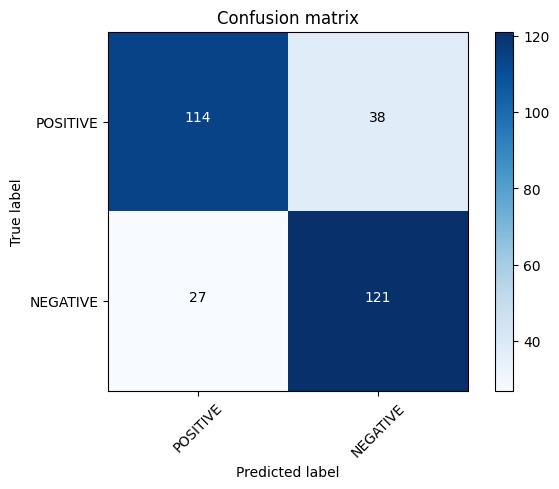

In [ ]:
#  Plotting confusion matrix using the custom confusion matrix function created above.
cm = metrics.confusion_matrix(Y_test,pred)
plot_confusion_matrix(cm,classes=['POSITIVE','NEGATIVE'])

In [ ]:
def predict(sample):
   #Substituting any other other character other than A-Z or a-z with ' '.
  review = re.sub('[^A-Za-z]',' ',string = sample)

  #Converting all the words into lowercase.
  review = review.lower()

  #Splitting the words.
  review = review.split()

  #If the word doesnot belong to the stopwords, then add it into review.
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]

  #Joining the words after stemming.
  review = ' '.join(review)

  temp= cv.transform([review]).toarray()
  return sub_classifier.predict(temp)


In [ ]:
sample = "The ambience is pleasant and food is good"
if predict(sample):
  print(sample + "- It is a positive review")
else:
 print(sample + "- It is a negative review")

The ambience is pleasant and food is good- It is a positive review
